In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import seaborn as sns

import matplotlib.colors as mcolors
#from PIL import Image   
from IPython.display import Image
from matplotlib.collections import PatchCollection

from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('./projekt1.csv')
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 2.0 MB


#### Podstawowe informacje

In [4]:
for i in data.columns:
    if data[i].nunique() < 5 :
        data[i] = data[i].astype('category')
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              4238 non-null   category
 1   age              4238 non-null   int64   
 2   education        4238 non-null   category
 3   currentSmoker    4238 non-null   category
 4   cigsPerDay       4238 non-null   float64 
 5   BPMeds           4238 non-null   category
 6   prevalentStroke  4238 non-null   category
 7   prevalentHyp     4238 non-null   category
 8   diabetes         4238 non-null   category
 9   totChol          4238 non-null   float64 
 10  sysBP            4238 non-null   float64 
 11  diaBP            4238 non-null   float64 
 12  BMI              4238 non-null   float64 
 13  heartRate        4238 non-null   float64 
 14  glucose          4238 non-null   float64 
 15  TenYearCHD       4238 non-null   category
dtypes: category(8), float64(7), int64(1)
memor

Ciekawostka: Jak dużo można miejsca zaoszczędzić po przez zmianę zmiennych na kategoryczne.

In [5]:
def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


To jest tylko po to zeby kolory ustawiać

In [6]:
data.prevalentStroke.value_counts()

No     4213
Yes      25
Name: prevalentStroke, dtype: int64

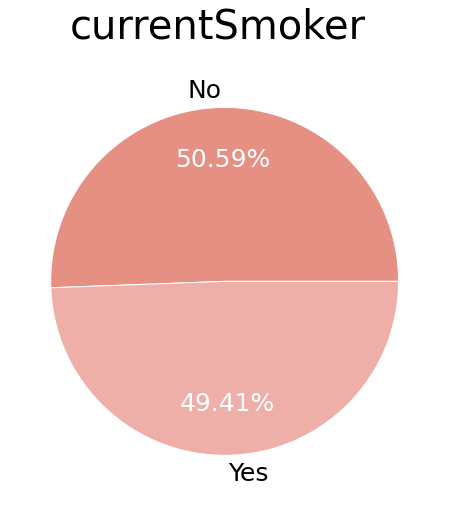

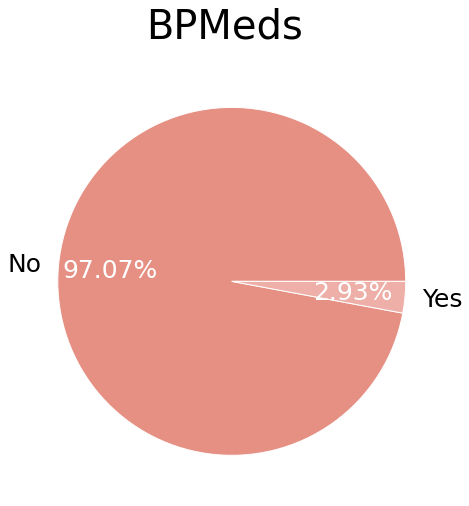

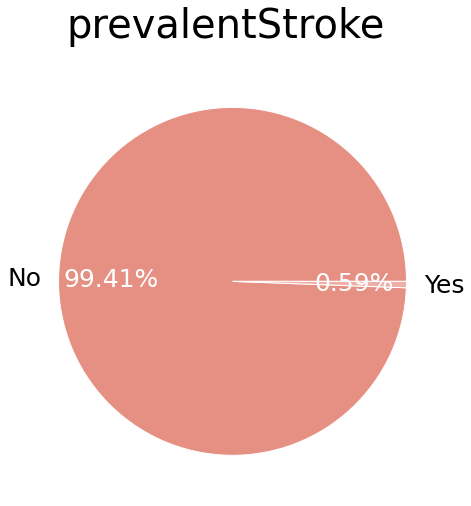

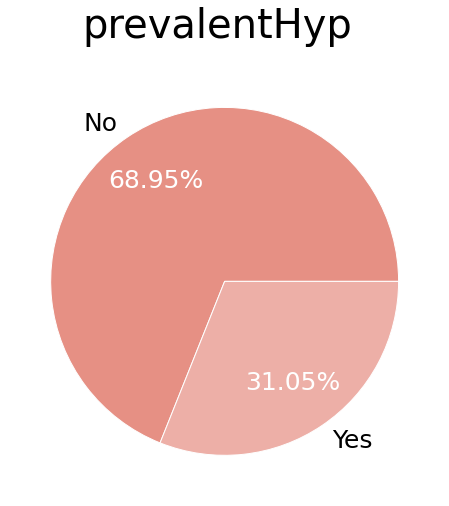

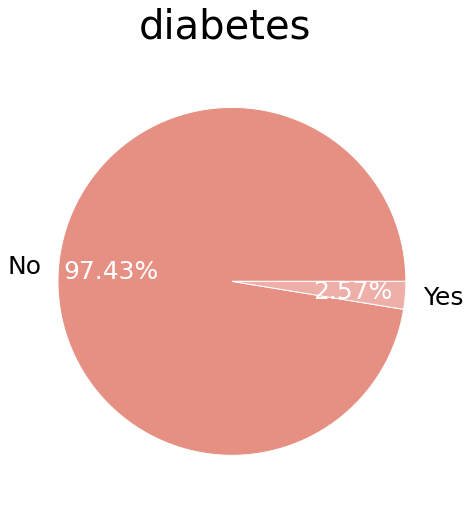

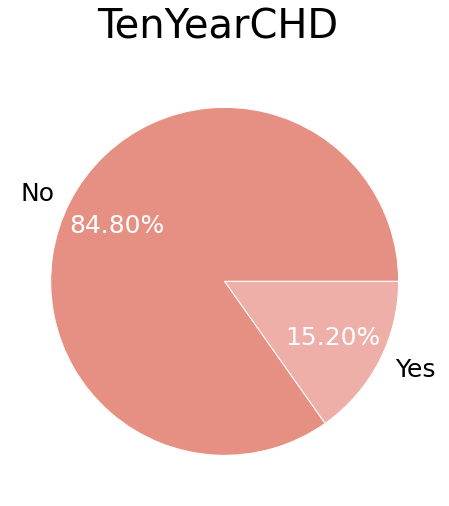

In [7]:
lista = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
for i in lista:
    fig, ax = plt.subplots(figsize=(8,8))

    dane = data.groupby(i).size()
    wedges, texts, autotexts = ax.pie(dane, radius=1, colors=[(231/256,145/256,133/256),(238/256,176/256,168/256)],
           wedgeprops=dict(edgecolor='w'), autopct='%1.2f%%', textprops=dict(color="black", fontsize = 25),
                                     pctdistance=0.7,
                                      labeldistance=1.1, labels = list(dane.index))
    for autotext in autotexts:
        autotext.set_color('white')


    #ax.set(aspect="equal", title='Sex')
    fig.suptitle(i, fontsize=40)
    #ax.legend(wedges, list(dane.index),
             # loc ="center left",
              #bbox_to_anchor =(1, 0, 0.5, 1), prop=dict(size=15))
  

    plt.show()

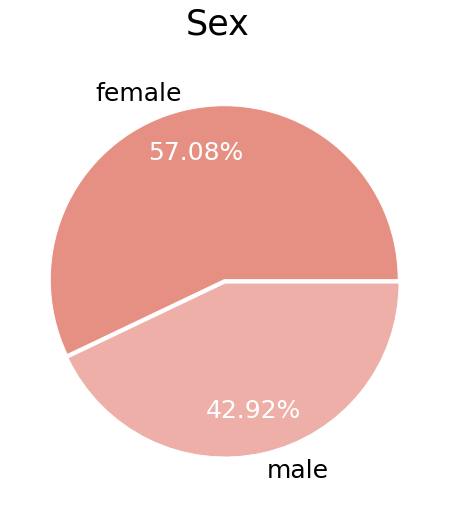

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

dane = data.groupby('sex').size()
wedges, texts, autotexts = ax.pie(dane, radius=1, colors=[(231/256,145/256,133/256),(238/256,176/256,168/256)],
       wedgeprops=dict(edgecolor='w'), autopct='%1.2f%%',explode=[0.01]*2, textprops=dict(color="black", fontsize = 25),
                                 pctdistance=0.75,
                                  labeldistance=1.1, labels = list(dane.index))
for autotext in autotexts:
    autotext.set_color('white')


#ax.set(aspect="equal", title='Sex')
fig.suptitle('Sex', fontsize=35)
#ax.legend(wedges, list(dane.index),
         # loc ="center left",
          #bbox_to_anchor =(1, 0, 0.5, 1), prop=dict(size=15))
ax.title.set_size(20)

plt.show()

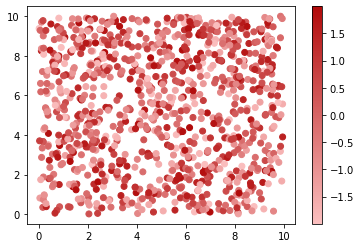

In [9]:

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
# rvb = make_colormap(
#     [(252/256,205/256,196/256),
#                       (250/256,168/256,152/256),(249/256,137/256,115/256),
#                       (247/256,100/256,71/256),(254/256,227/256,222/256),
#                          (243/256,50/256,11/256)])

rvb = make_colormap(
    [(252/256,192/256,192/256),(245/256,73/256,73/256),(178/256,10/256,10/256)])
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.colorbar()
plt.show()

In [10]:
nadcisnienie = data.groupby(["prevalentHyp",'BPMeds']).count()
nadcisnienie = nadcisnienie['sex'].reset_index()
nadcisnienie.loc[1] = ['No', 'Yes',0]
nadcisnienie

,prevalentHyp,BPMeds,sex
0,No,No,2922.0
1,No,Yes,0.0
2,Yes,No,1192.0
3,Yes,Yes,124.0


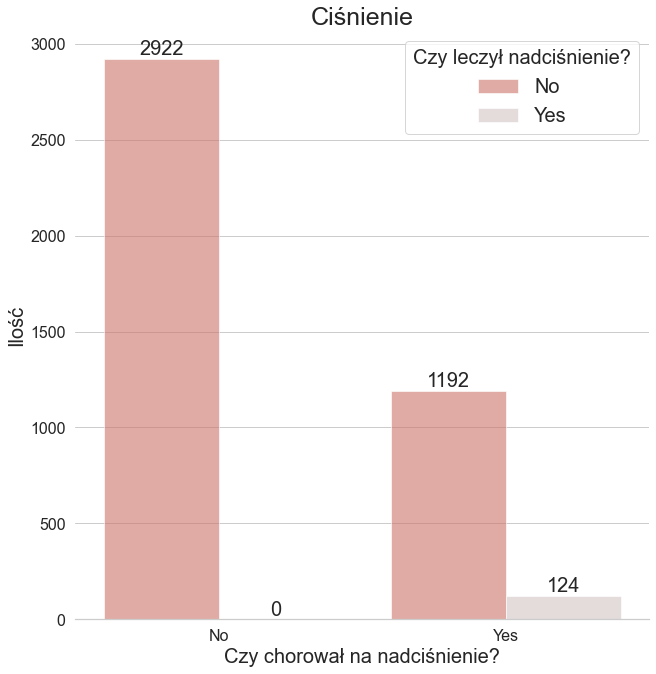

In [11]:
sns.set_theme(style="whitegrid")

g = sns.catplot(x="prevalentHyp", y="sex",
    data=nadcisnienie, kind="bar",
    hue="BPMeds",
    ci="sd", palette=[(222/256,104/256,88/256),(212/256,198/256,194/256)], alpha=.6, height=9, aspect=1, legend = False
)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{int(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize=20)
g.despine(left=True)
#g.set_axis_labels('Czy chorował na nadciśnienie?', "Ilość")
plt.xlabel('Czy chorował na nadciśnienie?',fontsize=20)
plt.ylabel("Ilość", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Ciśnienie", fontsize=25)
plt.legend(title = "Czy leczył nadciśnienie?",loc="best", frameon=True, title_fontsize=20, fontsize=20)
#g.legend.set_title("Czy leczył nadciśnienie?")
plt.show()

In [12]:
education = data.education.value_counts()
education = education.reset_index()
education['index'] = ['podstawowe', 'zawodowe','średnie','wyższe']
#education['education'] = education['education'].apply(lambda x: int(x))

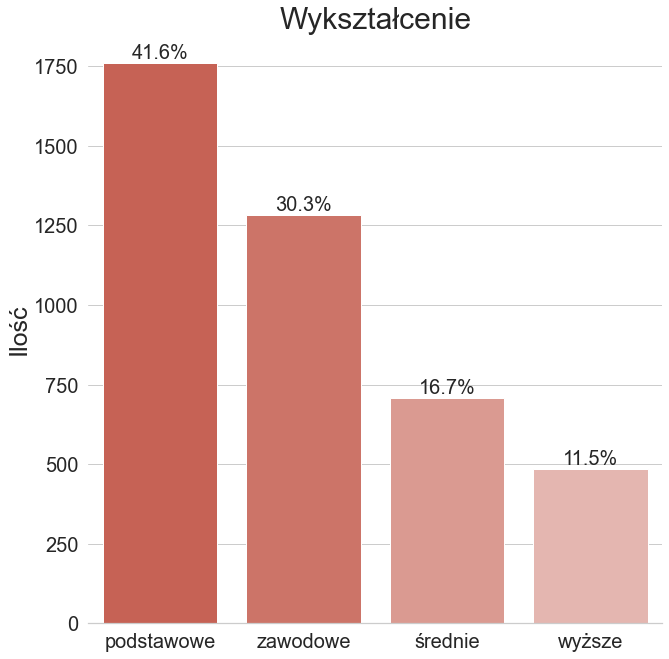

In [13]:
sns.set_theme(style="whitegrid")

g = sns.catplot(x="index", y="education",
    data=education, kind="bar",
    ci="sd", palette=[(218/256,84/256,66/256),(222/256,104/256,88/256),(231/256,145/256,133/256),(238/256,176/256,168/256)], height=9, aspect=1)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{h/education.education.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge', fontsize = 20)
g.despine(left=True)
#g.set_axis_labels('Czy chorował na nadciśnienie?', "Ilość")
plt.xlabel('')
plt.ylabel("Ilość", fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Wykształcenie", fontsize=30)
#plt.legend(title = "Czy leczył nadciśnienie?",loc="best", frameon=True, title_fontsize=20, fontsize=20)
#g.legend.set_title("Czy leczył nadciśnienie?")
plt.show()

## Wiek

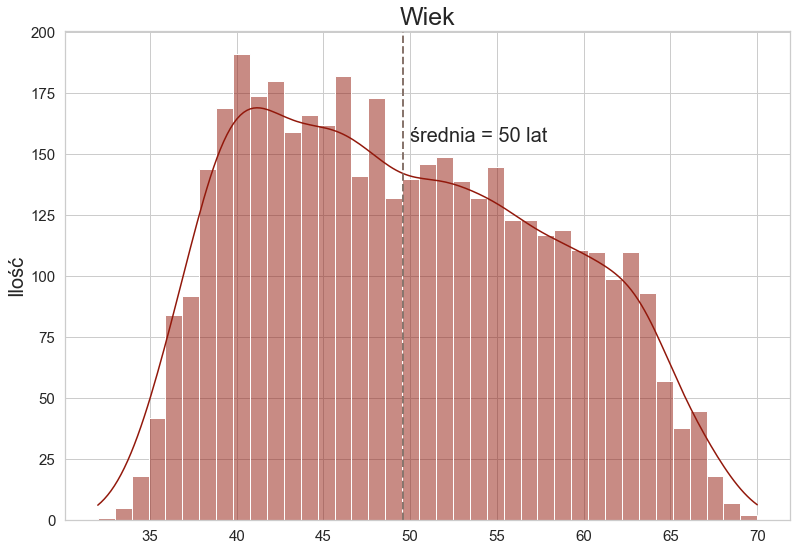

In [14]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['age'],
    color=(147/256,24/256,11/256), kde = True, bins = 39)
plt.axvline(x=data['age'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(50, 155, s = f"średnia = {round(data.age.mean())} lat",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("Ilość", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Wiek", fontsize=25)
plt.show()

### Zakres wieku

In [15]:
data.age.min()

32

In [16]:
data.age.max()

70

## Palenie - ile papierosów na dzień 

In [17]:
data['cigsPerDay'].nunique()

33

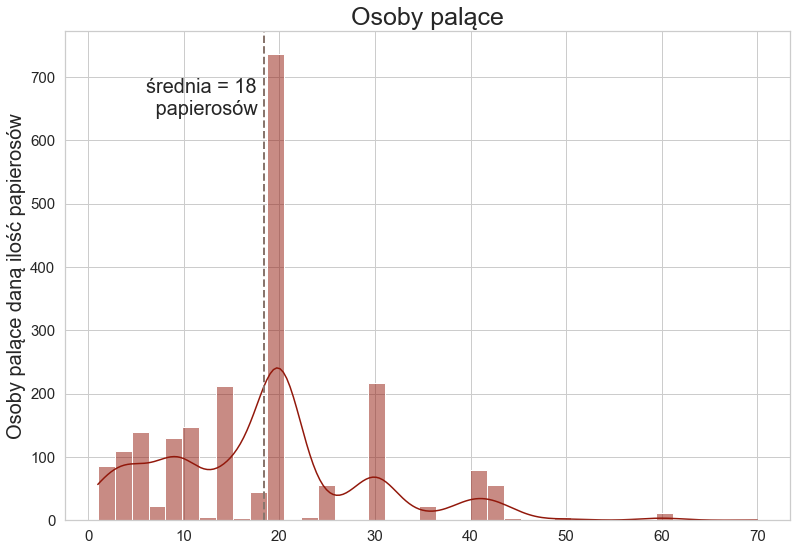

In [18]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

palący = data[data['cigsPerDay'] > 0]

g = sns.histplot(data = palący['cigsPerDay'],
    color=(147/256,24/256,11/256), kde = True, bins = 39)
plt.axvline(x=palący['cigsPerDay'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(6, 640, s = f"średnia = {round(palący.cigsPerDay.mean())} \n papierosów",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("Osoby palące daną ilość papierosów", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Osoby palące", fontsize=25)
plt.show()

Ta średnia jest tylko wśród osob palących - nie brałam tutaj pod uwagę tych co nie palą

## Poziom cholesterolu

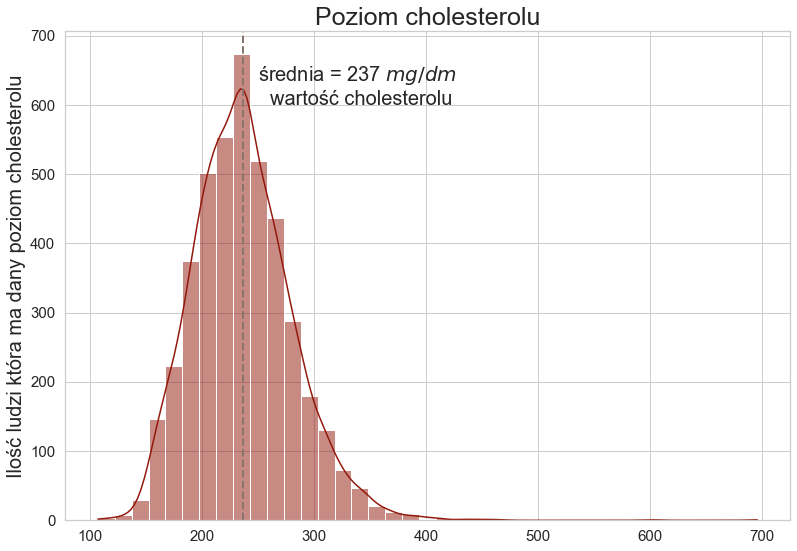

In [19]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['totChol'],
    color=(147/256,24/256,11/256), kde = True, bins = 39)
plt.axvline(x=data['totChol'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(250, 600, s = fr"średnia = {round(data.totChol.mean())} $mg/dm$" f' \n  wartość cholesterolu ',
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("Ilość ludzi która ma dany poziom cholesterolu", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Poziom cholesterolu", fontsize=25)
plt.show()

## Ciśnienie 

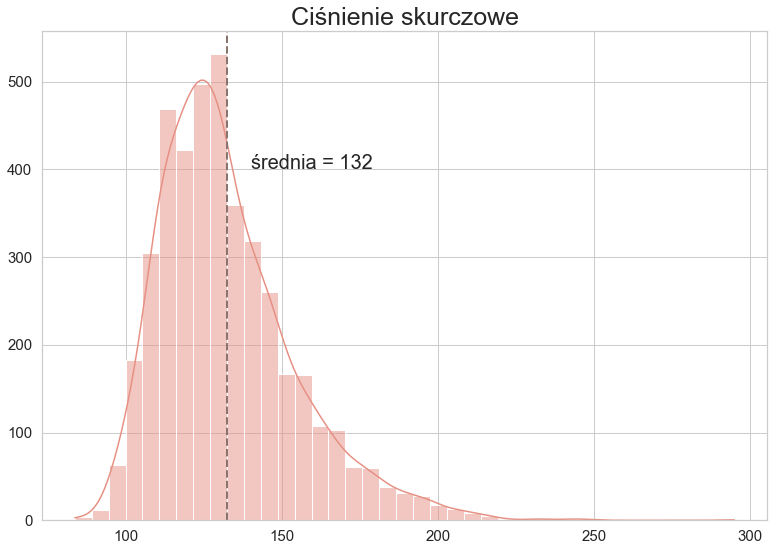

In [20]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['sysBP'],
    color=(231/256,145/256,133/256), kde = True, bins = 39)
plt.axvline(x=data['sysBP'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(140, 400, s = f"średnia = {round(data.sysBP.mean())}",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Ciśnienie skurczowe", fontsize=25)
plt.show()

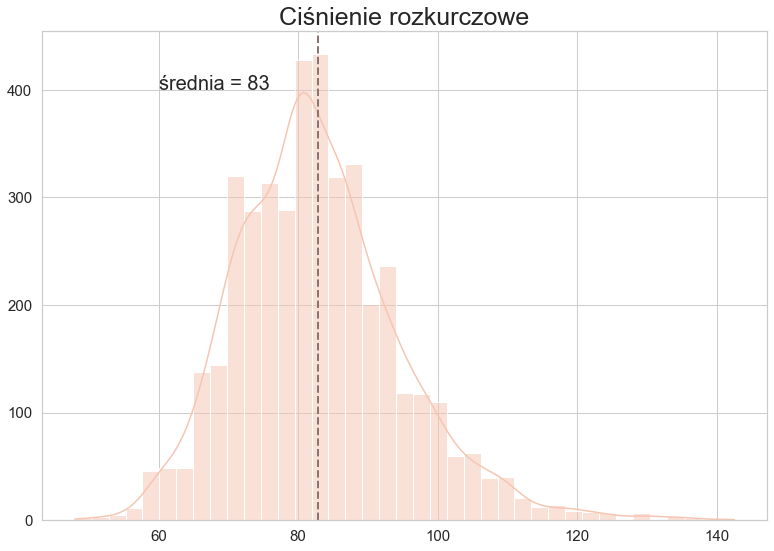

In [21]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['diaBP'],
    color=(247/256,198/256,179/256), kde = True, bins = 39)
plt.axvline(x=data['diaBP'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(60, 400, s = f"średnia = {round(data.diaBP.mean())}",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Ciśnienie rozkurczowe", fontsize=25)
plt.show()


## Wskaźnik BMI

Wskaźnik BMI – jakie są normy?
Podstawowa klasyfikacja BMI dla osób dorosłych wyróżnia cztery oceny wagi.

BMI większe niż 30 oznacza otyłość (występują różne stopnie otyłości)
BMI większe bądź równe 25, ale mniejsze lub równe 29,9 oznacza nadwagę
BMI większe bądź równe 18,5, ale mniejsze lub równe 24,9 oznacza prawidłową masę ciała
BMI mniejsze niż 18,5 oznacza niedowagę
Oczywiście obliczenie wskaźnika BMI nie jest ostatecznym wyznacznikiem stanu zdrowia. Otrzymany rezultat jest jedynie orientacyjną informacją, ale regularne sprawdzanie BMI pomaga kontrolować wagę ciała i uniknąć ryzyka otyłości.

Wskaźnik masy ciała a płeć
Warto zwrócić uwagę na to, że wzór i normy BMI są takie same dla kobiet i mężczyzn, a jak wiadomo, przedstawiciele obu płci różnią się nie tylko sylwetką, ale też proporcją tkanki tłuszczowej do masy mięśniowej. U kobiet występuje fizjologiczne uwarunkowanie do gromadzenia większej ilości tkanki tłuszczowej w organizmie. Jednocześnie mają one proporcjonalnie mniej mięśni. Dlatego należy pamiętać, że jeżeli u kobiety i mężczyzny występuje zbliżony wynik BMI, to istnieje duże prawdopodobieństwo, że u kobiety będzie wyższy poziom tkanki tłuszczowej. Jednak mężczyźni również mogą mieć zaburzoną proporcję tkanek wewnątrz organizmu. A to właśnie ona, a nie tylko masa ciała zwiększa ryzyko różnych chorób i schorzeń, np. układu krążenia czy insulinooporności.

Jednak nie tylko ilość tkanki tłuszczowej ma znaczenie w ocenie zagrożenia chorobami związanymi z otyłością. Ważne jest także rozmieszczenie tkanki tłuszczowej. Największe ryzyko zdrowotne niesie tłuszcz zgromadzony wokół narządów wewnętrznych, czyli wisceralna tkanka tłuszczowa. Z tego względu występująca częściej u mężczyzn otyłość brzuszna jest niebezpieczniejsza niż częściej dotykająca kobiety otyłość pośladkowo-udowa, czyli tłuszcz zgromadzony pod skórą. Aby określić rozłożenie tłuszczu w organizmie, stosuje się wskaźnik WHR (ang. waist–hip ratio), czyli stosunek obwodu talii do obwodu bioder.

Jak widać, sztywne ramy przedziałów wagi nie zawsze dają pełny i wyczerpujący obraz stanu zdrowia i mogą stanowić nadmierne uproszczenie. Chcąc uzyskać miarodajne informacje przy ocenie wagi, należy wziąć pod uwagę też aktywność fizyczną badanego i takie parametry, jak masa mięśni, zawartość wody (która u kobiet zmienia się wraz z dniem cyklu miesiączkowego) oraz masa kości. Nie zmienia to jednak faktu, że warto obliczyć BMI, ponieważ wskaźnik ten w większości przypadków z powodzeniem spełnia swoją funkcję i pozwala określić granice prawidłowej wagi.
https://www.lightbox.pl/poradnik-lightbox/kalkulatory/bmi#anchAnswer

<img src="./wskaźnikBMI.png" width=700 height=400 />

x to średnia, kreska w środku to mediana

Na potrzeby dalszych badań, tworzymy kolumnę z rodzajami masy ciała. 

Zakresy wartości BMI:

- mniej niż 16 - wygłodzenie
- 16 - 16.99 - wychudzenie
- 17 - 18.49 - niedowaga
- 18.5 - 24.99 - wartość prawidłowa
- 25 - 29.99 - nadwaga
- 30 - 34.99 - I stopień otyłości
- 35 - 39.99 - II stopień otyłości
- powyżej 40 - otyłość skrajna

In [22]:
data['BMI'].max()

56.8

In [23]:
def what_bmi(bmi):
    if  bmi < 16:
        return 'wygłodzenie'
    elif 16 <= bmi < 17:
        return 'wychudzenie' 
    elif 17 <= bmi < 18.5:
        return 'niedowaga'
    elif 18.5 <= bmi < 25:
        return 'prawidłowa'
    elif 25 <= bmi < 30:
        return 'nadwaga'
    elif 30 <= bmi < 35:
        return 'I otyłość'
    elif (35 <= bmi) & (bmi < 40):
        return "II otyłość"
    elif bmi >= 40:
        return "skrajna otył."
data["catBMI"] = data['BMI'].apply(lambda x: what_bmi(x))
data['catBMI'] = data['catBMI'].astype('category')

In [24]:
bmi = data.catBMI.value_counts()
bmi = bmi.reset_index()
#bmi['index'] = ['podstawowe', 'zawodowe','średnie','wyższe']
bmi.sort_values('catBMI', inplace = True)
bmi.reset_index(drop = True, inplace = True)
bmi.set_index([pd.Index([1,2,3,4,5,6,7,8])], inplace = True)
bmi

,index,catBMI
1,wygłodzenie,2
2,wychudzenie,11
3,skrajna otył.,26
4,niedowaga,44
5,II otyłość,93
6,I otyłość,420
7,nadwaga,1773
8,prawidłowa,1869


In [25]:
bmi.catBMI.sum()

4238

In [26]:
# listaBMI = ['wygłodzenie', 'wychudzenie',
#             'niedowaga', 'prawidłowa',
#             'nadwaga',  'I otyłość',
#             'II otyłość', 'skrajna otył.']
# bmi['index'] = bmi['index'].astype("category")
# bmi['index'] = bmi['index'].cat.set_categories(listaBMI)
# bmi.sort_values(["index"], inplace = True)

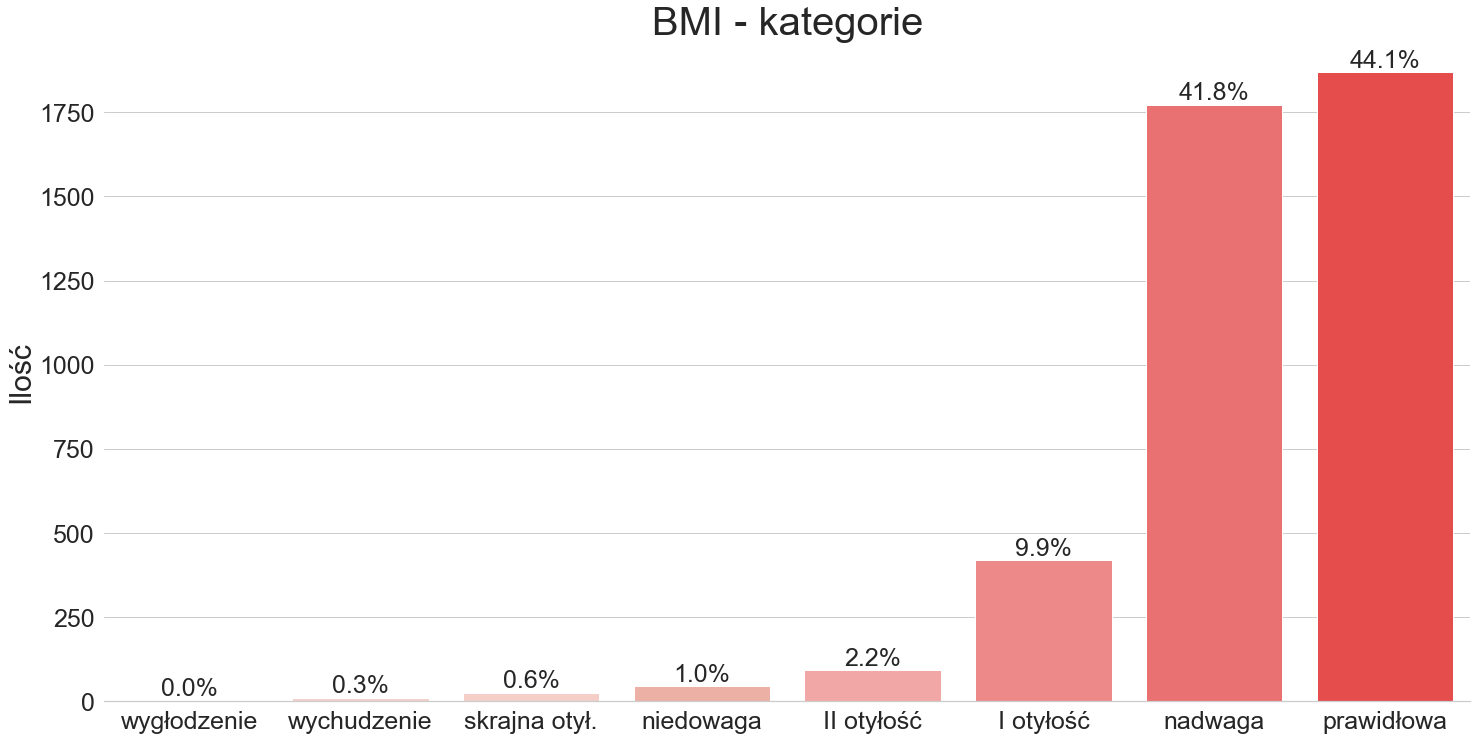

In [27]:
sns.set_theme(style="whitegrid")

g = sns.catplot(x="index", y="catBMI",
    data=bmi, kind="bar",
    ci="sd", palette =[
                        (254/256,227/256,222/256),(252/256,205/256,196/256),
        (252/256,202/256,192/256),(250/256,168/256,152/256),
        (255/256,155/256,155/256),(255/256,121/256,121/256),
        (255/256,93/256,93/256),(255/256,52/256,52/256)],
                height=10, aspect=2, order = bmi['index'])
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{h/bmi.catBMI.sum()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge', fontsize = 25)
g.despine(left=True)
#g.set_axis_labels('Czy chorował na nadciśnienie?', "Ilość")
plt.xlabel('')
plt.ylabel("Ilość", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.title("BMI - kategorie", fontsize=40)
#plt.legend(title = "Czy leczył nadciśnienie?",loc="best", frameon=True, title_fontsize=20, fontsize=20)
#g.legend.set_title("Czy leczył nadciśnienie?")
plt.show()

## Tętno

In [28]:
data.heartRate.nunique()

73

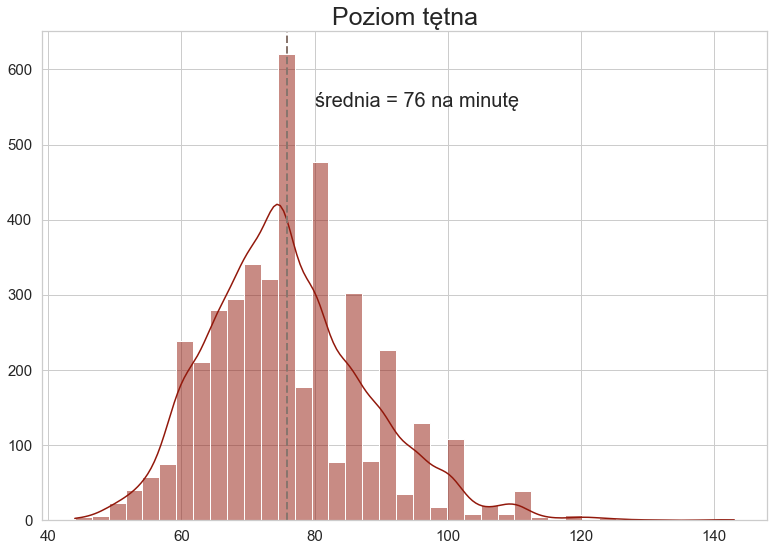

In [29]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['heartRate'],
    color=(147/256,24/256,11/256), kde = True, bins = 39)
plt.axvline(x=data['heartRate'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(80, 550, s = f"średnia = {round(data['heartRate'].mean())} na minutę",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Poziom tętna", fontsize=25)
plt.show()

## Poziom glukozy

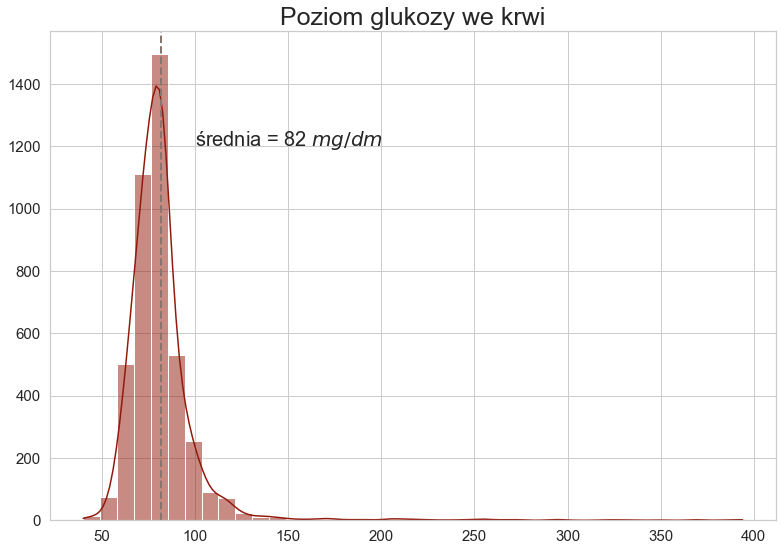

In [30]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="whitegrid")

g = sns.histplot(data = data['glucose'],
    color=(147/256,24/256,11/256), kde = True, bins = 39)
plt.axvline(x=data['glucose'].mean(),
            color=(137/256,117/256,109/256),
            ls='--', 
            lw=2)
plt.text(100, 1200, s = fr"średnia = {round(data.glucose.mean())} $mg/dm$",
         fontsize = 20, ma = 'center' )
plt.xlabel('')
plt.ylabel("", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Poziom glukozy we krwi", fontsize=25)
plt.show()

## Zmienna objaśniana

In [31]:
miary_stat = round(data.describe(),2)
miary_stat.to_excel('miary_stat.xlsx')
miary_stat

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00
mean,49.58,9.06,236.72,132.35,82.89,25.80,75.88,81.97
std,8.57,11.90,44.33,22.04,11.91,4.07,12.03,22.84
min,32.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,0.00,206.00,117.00,75.00,23.08,68.00,72.00
50%,49.00,0.00,234.00,128.00,82.00,25.41,75.00,80.00
75%,56.00,20.00,262.00,144.00,89.88,28.04,83.00,85.00
max,70.00,70.00,696.00,295.00,142.50,56.80,143.00,394.00


##### jest w pliku Excel ta tabela

## Confusion Matrixes

In [32]:
plt.style.use('seaborn-whitegrid')

### Macierz korelacji

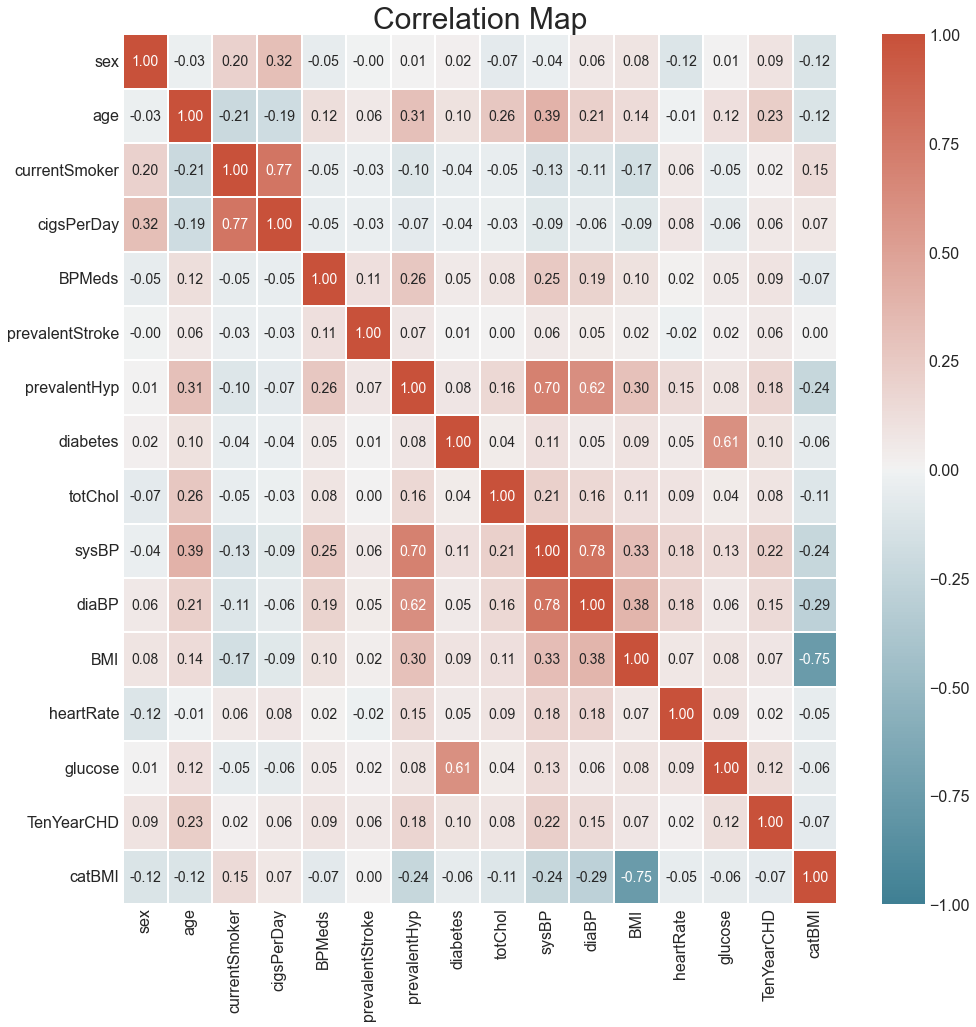

In [33]:
rvb = make_colormap(
    [(215/256,206/256,203/256),(244/256,108/256,94/256),(147/256,24/256,11/256)])

cmap = sns.diverging_palette(220, 18, as_cmap=True)
dataCor = data.copy()
for i in dataCor.columns:
    if (type(data[i][0]) != np.float64) and (type(data[i][0]) != np.int64):
        dataCor[i] = dataCor[i].cat.codes
matrix = np.triu(dataCor.corr())

sns.set_style("white")
f,ax=plt.subplots(figsize = (16,16))
sns.heatmap(dataCor.corr(),annot= True,fmt = ".2f",ax=ax,vmin = -1,
            vmax = 1, cmap = cmap,
            linewidth = 0.2,linecolor = "white", annot_kws={"fontsize":14})

plt.xticks(rotation=90, size = 16)
plt.yticks(rotation=0, size = 16)
plt.title('Correlation Map', size = 30)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, color = "black")
plt.show()

In [34]:
data.drop(['sysBP', 'BMI'], axis = 1, inplace = True)

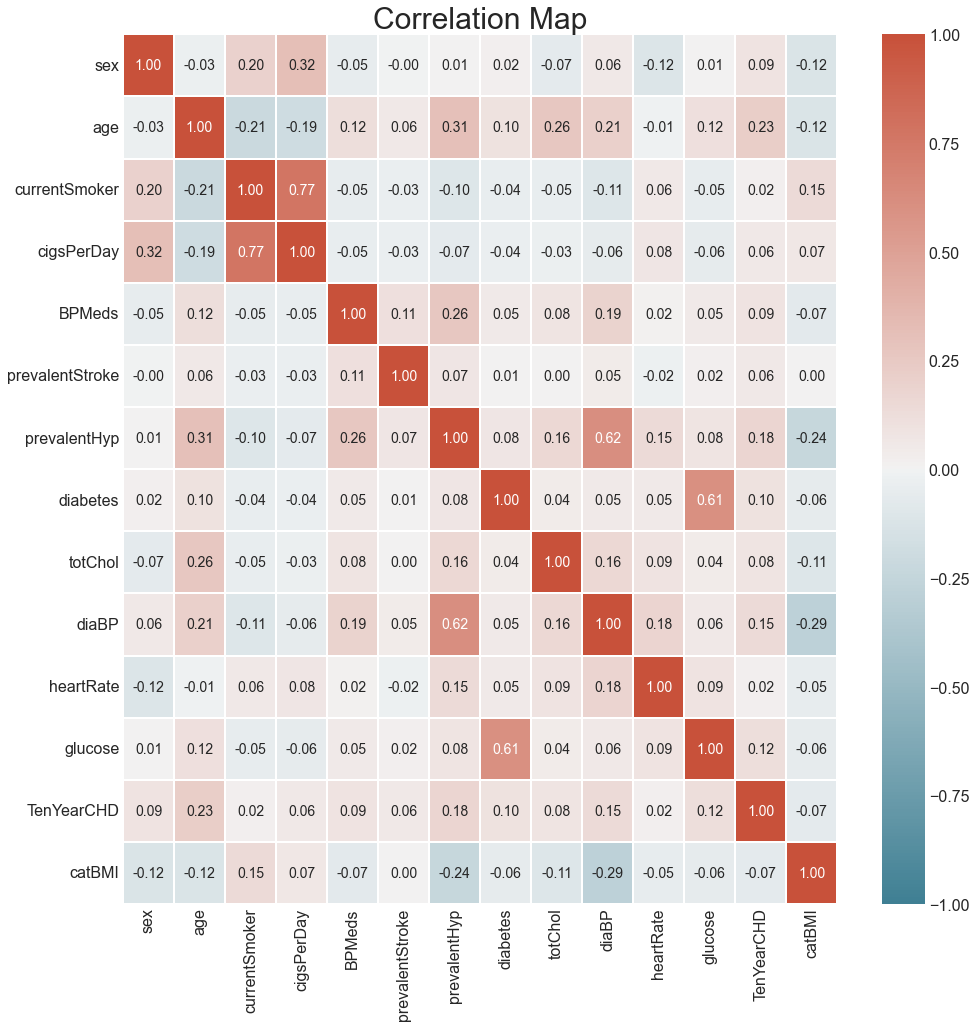

In [35]:
rvb = make_colormap(
    [(215/256,206/256,203/256),(244/256,108/256,94/256),(147/256,24/256,11/256)])

cmap = sns.diverging_palette(220, 18, as_cmap=True)
dataCor = data.copy()
for i in dataCor.columns:
    if (type(data[i][0]) != np.float64) and (type(data[i][0]) != np.int64):
        dataCor[i] = dataCor[i].cat.codes
matrix = np.triu(dataCor.corr())

sns.set_style("white")
f,ax=plt.subplots(figsize = (16,16))
sns.heatmap(dataCor.corr(),annot= True,fmt = ".2f",ax=ax,vmin = -1,
            vmax = 1, cmap = cmap,
            linewidth = 0.2,linecolor = "white", annot_kws={"fontsize":14})

plt.xticks(rotation=90, size = 16)
plt.yticks(rotation=0, size = 16)
plt.title('Correlation Map', size = 30)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, color = "black")
plt.show()

In [36]:
# dataCigs = data.drop('currentSmoker', axis = 1)
# dataSmoke = data.drop('cigsPerDay', axis = 1)

In [37]:
for i in range(len(data.columns)):
    if (data.dtypes[i] != 'O') & (data.dtypes[i] != 'category'):
        print(f'{data.columns[i]:15} --->  {kstest(data.iloc[:,i],"norm")}')

age             --->  KstestResult(statistic=1.0, pvalue=0.0)
cigsPerDay      --->  KstestResult(statistic=0.5, pvalue=0.0)
totChol         --->  KstestResult(statistic=1.0, pvalue=0.0)
diaBP           --->  KstestResult(statistic=1.0, pvalue=0.0)
heartRate       --->  KstestResult(statistic=1.0, pvalue=0.0)
glucose         --->  KstestResult(statistic=1.0, pvalue=0.0)


In [38]:
cols = ['age', 'cigsPerDay', 'totChol','diaBP','heartRate','glucose'] 
for i in cols:
    norm = MinMaxScaler().fit(data[[i]])

    data[i] = norm.transform(data[[i]])

In [39]:
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,heartRate,glucose,TenYearCHD,catBMI
0,male,0.184211,4.0,No,0.000000,No,No,No,No,0.149406,0.232804,0.363636,0.104520,No,nadwaga
1,female,0.368421,2.0,No,0.000000,No,No,No,No,0.242784,0.349206,0.515152,0.101695,No,nadwaga
2,male,0.421053,1.0,Yes,0.285714,No,No,No,No,0.234295,0.338624,0.313131,0.084746,No,nadwaga
3,female,0.763158,3.0,Yes,0.428571,No,No,Yes,No,0.200340,0.497354,0.212121,0.177966,Yes,nadwaga
4,female,0.368421,3.0,Yes,0.328571,No,No,No,No,0.302207,0.380952,0.414141,0.127119,No,prawidłowa


In [40]:
decimals = pd.Series([3, 3, 3, 3, 3, 3, ], index=['age','cigsPerDay', 'totChol', 'diaBP',
                                                           'heartRate', 'glucose'])
data = data.round(decimals)

In [41]:
data.to_csv('./projekt.csv',encoding='utf-8-sig')

## Confusion Matrixes

Confusion matrix - model logitowy dla próby uczącej

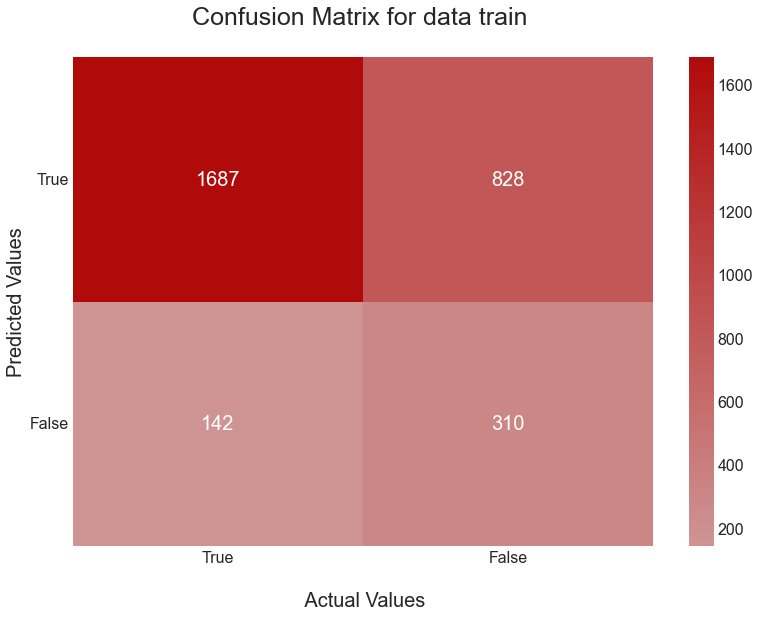

In [42]:
y_test = pd.read_excel('./y_test.xlsx',engine='openpyxl')
y_test = np.array(list(y_test['logit7.y']))

y_pred = pd.read_excel('./y_pred.xlsx',engine='openpyxl')
y_pred = np.array(list(y_pred['przew']))

cf_matrix = confusion_matrix(y_test, y_pred)

rvb = make_colormap(
    [(207/256,149/256,149/256),(211/256,80/256,77/256),(178/256,10/256,10/256)])

ax = sns.heatmap(cf_matrix, annot=True, cmap=rvb,fmt='d',annot_kws={"fontsize":20} )

ax.set_title('Confusion Matrix for data train \n', size = 25);
# ax.set_xlabel('\n Actual Values')
# ax.set_ylabel('Predicted Values');
plt.xlabel(xlabel = '\n Actual Values', size = 20)
plt.ylabel(ylabel = 'Predicted Values', size = 20)

plt.xticks(rotation=0, size = 16)
plt.yticks(rotation=0, size = 16)
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16, color = "black")


plt.show()

### Krzywa ROC w R